<a href="https://colab.research.google.com/github/NRJaggers/Applied-Stochastic-Processes/blob/main/Final%20Project/Branching%20Processes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Branching Processes



## What are Branching Processes?

A **branching process** is a stochastic model used in probability theory and statistics to describe the evolution of populations or systems over time. It is often used to model phenomena such as population growth, the spread of diseases, or the lifespan of particles in physics.
<br> <br>

<center>
<img src="https://github.com/NRJaggers/Applied-Stochastic-Processes/blob/main/Resources/Images/branching_gif.gif?raw=true:" alt="Branching Tree Gif" width=250>
</center>

In a branching process, individuals can give rise to offspring according to certain probabilistic rules. Each individual in the current generation can produce a random number of offspring, and the numbers of offspring produced by different individuals are typically assumed to be independent and identically distributed (i.i.d.). The distribution governing the number of offspring produced by each individual is called the offspring distribution.

Branching processes are often represented using a branching tree diagram, where each node represents an individual and the branches represent their offspring. By analyzing the properties of the branching process and the offspring distribution, statisticians can make predictions about the long-term behavior of the population or system, such as the probability of extinction or the expected population size.

*Note: This notebook uses code for some visualisation, computation and simulation. In the appendix at the end you can find the installation and initialisation cells that will allow you to run the code in this notebook. Run the installation and initialisation cells in the appedix before trying to run any other code cells in the notebook.*

## What Can They Teach Us?

To find out how a branching process can be useful in making preditions, lets start by defining the parameters of a branching process. Afterwards, we can ask what significant information we can derive out of this model.

### Definitions

In a branching process we are concerned with the size of the population at a given time.

Let $Z_t$ denote the population of the process at time $t$, where time can be either discrete or continuous and where population is discete.

Also let $Z_0 = 1$.

Nodes (parents) will branch (have childeren) according to a distribution refered to as the **offspring distribution**.

$$\{p_0, p_1, p_2, ... p_n\}$$

Where n is the amount of branches or offspring a node will have. Also remember the sum of these probabilities must equal 1. Every node will have the same offspring distribution and all nodes are independent from eachother.

Here we can see that the amount of offspring from a node will be a random variable which we will call $Y_{t,i}$ where t is time and i is the ith member of the population at the previous time. We can now rewrite $X_t$ as the sum of all $Y_{t,i}$ for a given time.

$$Z_t = Y_{t,1} + Y_{t,2} + ... + Y_{t,i}= \sum_{i=0}^{Z_{t-1}} Y_{t,i}$$

*Note: We see the Markov property here. Future generations are conditionally independent of the past given that we know the present value. In other words the population of the next generation only depends on what the current population is.*



### What Questions Can we Ask?

There are several questions we can ask and seek out answers for pertaining to this stochastic model.
- What is the probability the population has a certain value at a certain time?
- What is the probability the population goes extinct?
- What is the expected size of the population at a certain time?
- What is the total population seen across generations?
- What is the variance of the process at a certain time?

The main focus for many statisticians is the 2nd bulletpoint, the probability of extinction.

### Derivations and Results

*Note: It is possible to derive the formulas for the values seen in the questions above, however this is a class about application of stocastic processes so I will just give an overview of the derivations and emphasize the final results. Full derivations can be found [here](https://bookdown.org/probability/bookdown-demo/branching-processes.html#long-term-population-metrics).*

#### Probability

To find probabilities for branching processes, a new statistical tool is needed. Proability Generating Functions (PGF) are exactly what they sound like. They are functions that create probabilties for certain inputs.
$$\Pi_X(s) = E(s^X) = \sum_{x = 0}^{\infty} P(X = x)s^x$$

The function here is $\Pi$ and pertains to a discrete random variable $X$ with input $s$ which is a notekeeping variable.
<br> <br>

It can be shown that:
$$P(X = n) = \frac{\Pi_X(0)^{(n)}}{n!} $$

Which is a way we can calculate probabilities for different values of a random variable.



We can also use PGFs to derive $p_e$, the probability of extinction. This (along with the previous result) takes a good bit of math to prove and a few times reading over to get comfortable with. The final result is easier to grapple with.

$$p_e = \Pi_{X_0}(p_e)$$

Here we set the extiction probability equal to the PGF of the offspring distribution, $\Pi_{X_0}$, with the extiction probability as the input. Then we can solve for $p_e$ to find our probability.

*Note: This often leads to a polynomial equation with multiple possible solutions. It can be proven that the smallest solution is the correct one. Look [here](https://bookdown.org/probability/bookdown-demo/branching-processes.html#long-term-population-metrics:~:text=Specifically%2C%20we%20can%20assert,to%20the%20equation) for more details.*

#### Expected Value

We may also be interested in the population at a specific time or the long term total population.

If we let $\mu$ be the mean of the offspring distribution then we can find the expected size of the population at time t as the following:

$$\mu_t = E(X_t) = \mu^t$$

To find the total population across all generations lets define a new variable $M$ that is the sum of the differnt populations.

$$M_t = X_0 + X_1 + ... + X_t$$

Then we can find the expected value of $M$ which results in:

$$E(M_t) = 1 + \mu + \mu^2 + ... + \mu^t$$

#### Variance

The variance of the population at time t is as follows:

$$\sigma_t^2 = \mu^{t-1}\sigma^2(1 + \mu + \mu^2 + ... + \mu^{t-1})$$

where $\sigma$ is the variance of the offspring distribution.

This results in a few cases based on the value of $\mu$.

$$
\begin{array}{|c|c|}
\hline
\mu & \sigma^2 \\
\hline
\\
> 1 & \text{as } t \rightarrow \infty;\text{ } \sigma_t^2 \rightarrow \infty \\
\\
= 1 & t \cdot \sigma^2 \\
\\
< 1 & \frac{\mu^{t - 1} \sigma^2}{1 - \mu} \\
\\
\hline
\end{array}
$$

## Application of Branching Processes

A section that has examples on how to use/find values talked about above.

Now that we have established what a branching process is, some of its properties and some of its values of interest, lets take some time to apply what we have just talked about.

### Finding Probabilities

Blurb about binomial distribution and finding its PGF and offspring distribution and link to bookdown...

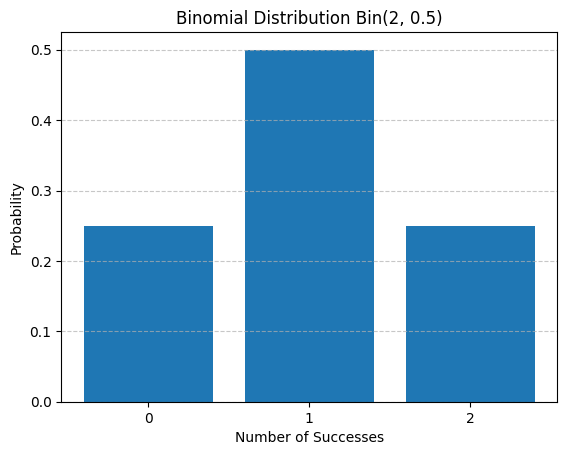

   Number of Successes  Probability
0                    0         0.25
1                    1         0.50
2                    2         0.25

For Binom(2,0.5000), Expected Value = 1.0000


In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

#------------------------------------------------------------------------------#
#---USER EXPLORATION HERE!!!---#

# Define parameters
n = 2  # Number of trials
p = 0.5  # Probability of success

#------------------------------------------------------------------------------#

# Generate the distribution
x = np.arange(0, n+1)  # Possible number of successes
pmf = binom.pmf(x, n, p)  # Probability mass function
distribution_df = pd.DataFrame({'Number of Successes': x, 'Probability': pmf})


# Plot the distribution
plt.bar(x, pmf)
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Distribution Bin({}, {})'.format(n, p))
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(distribution_df)

# Find Expectec Value of Binom
ev = 0
for i in range(0,len(pmf)):
  ev = ev + i*pmf[i]

# n*p and ev are eqivalent
print("\nFor Binom({:d},{:0.4f}), Expected Value = {:0.4f}".format(n,p,ev))

In [124]:
import sympy as sp
import math

#------------------------------------------------------------------------------#
#---USER EXPLORATION HERE!!!---#

# Number of trials
n = 2

# Probability of success
p_val = 0.5
q_val = 1-p_val

# Random Variable value of interest
x = 1

#------------------------------------------------------------------------------#

# Define symbols
p = sp.symbols('p')
q = sp.symbols('q')
s = sp.symbols('s')

# Define the PGF
pgf_Binom = (q+p*s)**n

# Take the derivative of the expression with respect to a variable
derivative = sp.diff(pgf_Binom, s, x)
# print("Derivative:", derivative)

# Find the factorial
factorial = math.factorial(x)

# Suppose you want to substitute specific values
values = {p: p_val, q: q_val, s:0}

# Find probability
P_x = derivative.subs(values)/factorial
print("For Binom({:d},{:0.4f}), P(X = {:d}) = {:0.4f}".format(n,p_val,x,P_x))

For Binom(2,0.5000), P(X = 1) = 0.5000


In [96]:
import sympy as sp

#------------------------------------------------------------------------------#
#---USER EXPLORATION HERE!!!---#

# Number of trials
n = 5

# Probability of success
p_val = 0.3
q_val = 1-p_val

#---Note---:
# The math and debugging gets nasty after n = 2, so instead of getting a
# symbolic solution and trying to solve for p_e after the fact, we will just
# skip finding the symbolic solution and jump straight to finding the
# probability of extinction.

#------------------------------------------------------------------------------#

if n <=2 :
  # Define symbols
  p = sp.symbols('p')
  q = sp.symbols('q')
  s = sp.symbols('s')

  # Define the PGF when set equal to p_e but solved so all terms are on one side
  pgf_Binom_ext = (q+p*s)**n - s

  # Solve the equation
  solutions = sp.solve(pgf_Binom_ext, s)
  print("Solutions:", solutions, "\n")

  # Suppose you want to substitute specific values for 'p' and 'q'
  values = {p: p_val, q: q_val}

  # Substitute the values into the solution(s) and find probability of extinction
  p_e = 1.1 # set higher than maximum to allow for it to find minimum

  for i in range(0,len(solutions)):
    solution_with_values = solutions[i].subs(values).evalf()
    print("Solution {:d} with values substituted: {:0.4f}".format(i+1,solution_with_values))

    if p_e > solution_with_values:
      p_e = solution_with_values

  # Present results on extinction probability
  print("\n-----------------------------------------------------------------------")
  print("For Binom({:d},{:0.4f}), extinction probability = {:0.4f}".format(n,p_val,p_e))

else :
  # Define the PGF
  pgf_Binom_ext = (q_val+p_val*s)**n - s

  # Solve the equation
  solutions = sp.solve(pgf_Binom_ext, s)
  print("Solutions:", solutions)

  # Find probability of extinction - note p_e should be between 0-1
  p_e = 1.1 # set higher than maximum to allow for it to find minimum
  for i in range(len(solutions)):
    if solutions[i].is_real:
        if solutions[i] > 0:
            if p_e > solutions[i]:
               p_e = solutions[i]

  # Present results on extinction probability
  print("\n-----------------------------------------------------------------------")
  print("For Binom({:d},{:0.4f}), extinction probability = {:0.4f}".format(n,p_val,p_e))


Solutions: [-7.29309912079810, 0.318919148648934, 1.00000000000000, -2.84624334725875 - 4.65139679938017*I, -2.84624334725875 + 4.65139679938017*I]

-----------------------------------------------------------------------
For Binom(5,0.3000), extinction probability = 0.3189


### Finding Expected Value


Lets continue the exploration of branching processes and find the expected population at a given time when our offspring distribution is binomially distributed.

If we have $Bin(n,p)$ describe our distribution of decendents for each node, then we can take the average of our offspring distribution $\mu$ to be the expected value of $Bin(n,p)$. In otherwords we can let $\mu = n \cdot p$.

Then to find the expected value of the population we can refer to our equation above.
$$\mu_t = \mu^t$$

In [154]:
#------------------------------------------------------------------------------#
#---USER EXPLORATION HERE!!!---#

# Define parameters
n = 2  # Number of trials
p = 0.5  # Probability of success
t = 3  # number of generations

#------------------------------------------------------------------------------#

#offspring distribution
mu = n*p

#Expected Value at current generation
mu_t = mu**t

print("\nFor Binom({:d},{:0.4f}), Expected Value at generation {:d} = {:0.4f}".format(n,p,t, mu_t))


For Binom(2,0.5000), Expected Value at generation 3 = 1.0000


We could extend this to find the total population across generations.

In [162]:
#------------------------------------------------------------------------------#
#---USER EXPLORATION HERE!!!---#

# Define parameters
n = 2  # Number of trials
p = 0.5  # Probability of success
t = 3  # number of generations

#------------------------------------------------------------------------------#

#offspring distribution
mu = n*p

#Expected Value at current generation
mu_t = 0
for i in range(0,t+1):
  mu_t += mu**t

print("\nFor Binom({:d},{:0.4f}), Expected Value up to generation {:d} = {:0.4f}".format(n,p,t, mu_t))


For Binom(2,0.5000), Expected Value up to generation 3 = 4.0000


### Finding Variance

## Example Problems

other stuff

Analytical Question/Solution

Simulation Question/Solution

Discrete Question/Solution

Continuous Question/Solution

## Conclusion

Concluding Remarks and introduce variations.

mention the many variations at some point. Maybe at the begining when getting definitions out, maybe at the end as a conclusion for further research if interested. Variations you can find on wikepidia and on some of the books/articles you found

## References

1. https://en.wikipedia.org/wiki/Branching_process
2. https://bookdown.org/probability/bookdown-demo/branching-processes.html#long-term-population-metrics
3. https://www.youtube.com/playlist?list=PLRogqfr-vZMfvcLjjmXnb0wk6MPTzhph-

## Appendix

### Installations

### Initialisation